In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Loading CSV data into data frame.
Cust_Loan_df = pd.read_csv('Data/Final Project/Customer_Loan_Data.csv')

# Checking the data.
Cust_Loan_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [48]:
# Checking the total rows and columns of data frame.
Cust_Loan_df.shape

(252000, 13)

In [49]:
# Checking the features.
Cust_Loan_df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [50]:
# Checking the feature datatypes.
Cust_Loan_df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

### Step 1 - Prepping Data:

In [51]:
# Identifying unwanted columns and deleting them from data frame as they are not required for our analysis.

# Removing unwanted columns from dataframe.
Cust_Loan_df = Cust_Loan_df.drop(['Id','CITY','STATE','Experience','Married/Single','Profession','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'], axis = 1)


In [39]:
# Identifying outliers/bad data: Checking if there are any null values.

Cust_Loan_df.isna().sum()

Income                          0
Age                             0
House_Ownership                 0
Car_Ownership                   0
Risk_Flag                       0
House_Ownership_norent_noown    0
House_Ownership_owned           0
House_Ownership_rented          0
Car_Ownership_no                0
Car_Ownership_yes               0
dtype: int64

In [40]:
# Creating dummy variables for categorical variables.
Cust_Loan_df = pd.concat([Cust_Loan_df,pd.get_dummies(Cust_Loan_df[['House_Ownership','Car_Ownership']])],axis=1)

# Viewing data frame.
Cust_Loan_df.head()

,Income,Age,House_Ownership,Car_Ownership,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes
0,1303834,23,rented,no,0,0,0,1,1,0,0,0,1,1,0
1,7574516,40,rented,no,0,0,0,1,1,0,0,0,1,1,0
2,3991815,66,rented,no,0,0,0,1,1,0,0,0,1,1,0
3,6256451,41,rented,yes,1,0,0,1,0,1,0,0,1,0,1
4,5768871,47,rented,no,1,0,0,1,1,0,0,0,1,1,0


#### Visualizations:

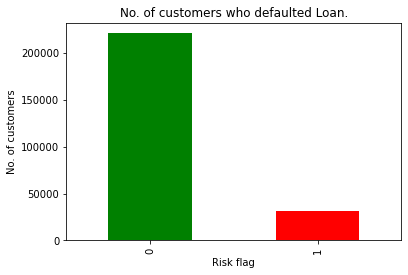

In [41]:
# Checking how many customers are at risk of loan defaulting.
Cust_Loan_df.groupby('Risk_Flag')['Age'].count().plot(kind='bar', color = ['green','red'])
plt.title('No. of customers who defaulted Loan.')
plt.xlabel('Risk flag')
plt.ylabel('No. of customers')
plt.show()

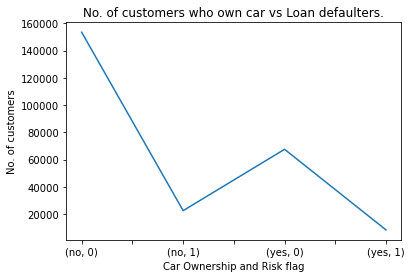

In [42]:
# Number of customers who own car vs Loan defaulters.i
Cust_Loan_df.groupby(['Car_Ownership','Risk_Flag'])['Age'].count().plot()
plt.title('No. of customers who own car vs Loan defaulters.')
plt.xlabel('Car Ownership and Risk flag')
plt.ylabel('No. of customers')
plt.show()

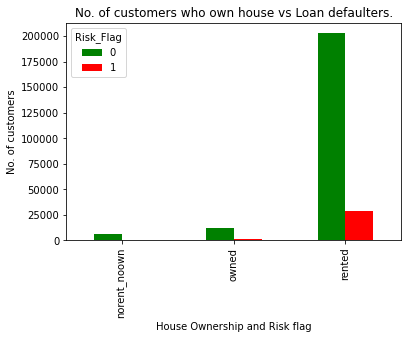

In [43]:
# Number of customers who own house vs Loan defaulters.
Cust_Loan_df.groupby(['House_Ownership','Risk_Flag'])['Age'].count().unstack('Risk_Flag').plot(kind='bar', color = ['green','red'])
plt.title('No. of customers who own house vs Loan defaulters.')
plt.xlabel('House Ownership and Risk flag')
plt.ylabel('No. of customers')
plt.show()

### Step 2 - Building and evaluating the model:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
# Choosing the Predictor column.
X = Cust_Loan_df.drop(['House_Ownership','Car_Ownership'],axis=1)               

# Choosing the target column.
y = Cust_Loan_df['Risk_Flag']              

# Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)  

### Step 3 - Interpreting our results:

In [44]:
# Training a logistic regression model on training data.
regr = LogisticRegression()

# Fitting model.
regr.fit(X_train, y_train)

# Calculating accuracy score.
regr.score(X_test, y_test)

0.8745833333333334

### Step 4 - Conclusion (draft):

Observations:
Firstly from visualization 1, we found the number of customers who are at risk of loan defauting (using previous records) and its low compared to customer with no risk. 
Secondly, from visualization 2 we see that Customers who do not own car are more likely to default the loan than the ones who do have their own car. 
And finally from visualization 3, we see that Customers who rents house are more likely to default the loan than the ones who do have their own house. 

Evaluation:
After building logistic model, we see that the accuracy score is 87% which indicates our is good fit.

We can evaluate another model and compare the results.